Importación de librerías


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [3]:
df = pd.read_csv(r'/media/adolfo/Almacenamiento/PROGRAMACIÓN/Proyectos/Data/Air/air/data/raw/annual_aqi_by_county_2022.csv')

Primer acercamiento a los datos


In [4]:
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2022,141,119,22,0,0,0,0,96,52,40,0,0,114,27,0
1,Alabama,Clay,2022,58,50,8,0,0,0,0,64,52,27,0,0,0,58,0
2,Alabama,DeKalb,2022,242,225,17,0,0,0,0,97,48,37,0,0,224,18,0
3,Alabama,Elmore,2022,117,110,7,0,0,0,0,67,47,37,0,0,117,0,0
4,Alabama,Etowah,2022,179,140,39,0,0,0,0,93,58,42,0,0,76,103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,Wyoming,Sublette,2022,243,208,34,1,0,0,0,105,54,46,0,0,242,1,0
962,Wyoming,Sweetwater,2022,212,176,35,0,1,0,0,157,57,43,0,0,152,31,29
963,Wyoming,Teton,2022,213,200,13,0,0,0,0,100,48,44,1,1,209,2,0
964,Wyoming,Uinta,2022,181,179,2,0,0,0,0,55,17,6,0,0,0,0,181


In [5]:
df.dtypes

State                                  object
County                                 object
Year                                    int64
Days with AQI                           int64
Good Days                               int64
Moderate Days                           int64
Unhealthy for Sensitive Groups Days     int64
Unhealthy Days                          int64
Very Unhealthy Days                     int64
Hazardous Days                          int64
Max AQI                                 int64
90th Percentile AQI                     int64
Median AQI                              int64
Days CO                                 int64
Days NO2                                int64
Days Ozone                              int64
Days PM2.5                              int64
Days PM10                               int64
dtype: object

Búsqueda de nulos: no existen nulos

In [6]:
(
    df
    .isnull()
    .any()
)

State                                  False
County                                 False
Year                                   False
Days with AQI                          False
Good Days                              False
Moderate Days                          False
Unhealthy for Sensitive Groups Days    False
Unhealthy Days                         False
Very Unhealthy Days                    False
Hazardous Days                         False
Max AQI                                False
90th Percentile AQI                    False
Median AQI                             False
Days CO                                False
Days NO2                               False
Days Ozone                             False
Days PM2.5                             False
Days PM10                              False
dtype: bool

In [ ]:
df_group = df.groupby('State').median()
df_group.reset_index()

In [8]:
df_group10 = df_group.sort_values('Max AQI', ascending=False).head(10)
df_parabox = df_group10.reset_index()

Promedio de AQI anual por estado: 

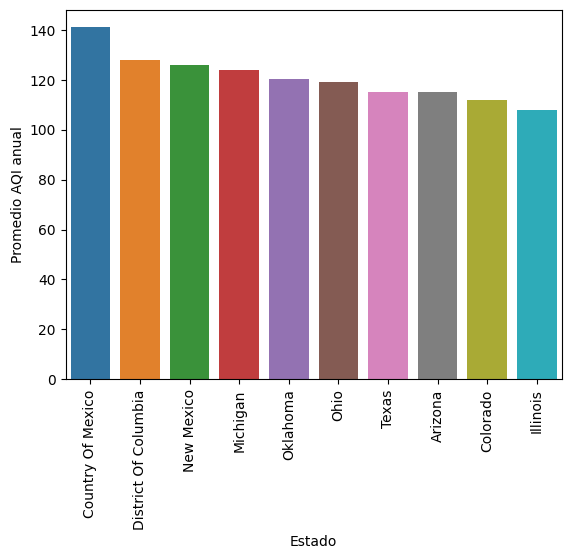

In [9]:
# Crear el gráfico de barras utilizando Seaborn
grafico1 = sns.barplot(x="State", y="Max AQI", data=df_parabox)

# Configurar las etiquetas del eje x y y
plt.xlabel("Estado")
plt.ylabel("Promedio AQI anual")

grafico1.set_xticklabels(grafico1.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()

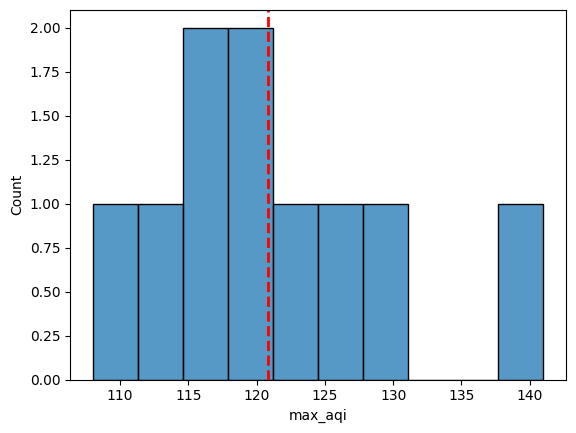

In [40]:
df_paraplot = df_parabox.rename(columns={'Good Days': 'good-days', 'Max AQI': 'max_aqi', 'Days Ozone': 'ozone', 'Days PM2.5': 'pm2.5'})
df_paraplot

sns.histplot(
    data=df_paraplot,
    x='max_aqi',
    bins=10
    

)
plt.axvline(
    x=df_paraplot.max_aqi.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
    
)

In [41]:
df_paraplot

,State,Year,Days with AQI,good-days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,max_aqi,90th Percentile AQI,Median AQI,Days CO,Days NO2,ozone,pm2.5,Days PM10
0,Country Of Mexico,2022.0,273.0,114.5,134.5,15.5,8.5,0.0,0.0,141.0,98.5,54.0,0.0,0.0,89.5,149.0,34.5
1,District Of Columbia,2022.0,213.0,153.0,56.0,4.0,0.0,0.0,0.0,128.0,67.0,43.0,1.0,21.0,130.0,61.0,0.0
2,New Mexico,2022.0,212.0,146.0,53.0,4.0,0.0,0.0,0.0,126.0,67.0,45.0,0.0,0.0,186.0,0.0,0.0
3,Michigan,2022.0,173.5,124.0,23.0,1.5,0.0,0.0,0.0,124.0,61.0,39.0,0.0,0.0,106.0,56.5,0.0
4,Oklahoma,2022.0,225.0,160.0,57.5,3.0,0.0,0.0,0.0,120.5,71.0,44.5,0.0,0.0,155.0,88.5,0.0
5,Ohio,2022.0,239.0,182.0,36.0,1.0,0.0,0.0,0.0,119.0,58.0,41.0,0.0,0.0,165.0,72.0,0.0
6,Texas,2022.0,212.0,164.5,44.5,2.0,0.0,0.0,0.0,115.0,64.0,42.0,0.0,0.0,129.5,72.0,0.0
7,Arizona,2022.0,273.0,196.0,76.0,1.0,0.0,0.0,0.0,115.0,67.0,45.0,0.0,0.0,195.0,5.0,68.0
8,Colorado,2022.0,273.0,165.0,64.5,2.0,0.0,0.0,0.0,112.0,65.5,46.0,0.0,0.0,238.5,1.0,0.5
9,Illinois,2022.0,273.0,209.0,48.0,2.0,0.0,0.0,0.0,108.0,60.0,40.0,0.0,0.0,161.0,108.0,0.0
